In [1]:
import networkx as nx
import graph_tool.all as gt
import numpy as np

In [2]:
import os
os.getcwd()

'/home/student/Desktop/research/project'

In [2]:
from matplotlib import pyplot as plt

In [3]:
graph = gt.load_graph('graph.graphml')

# Radial Tree Layout

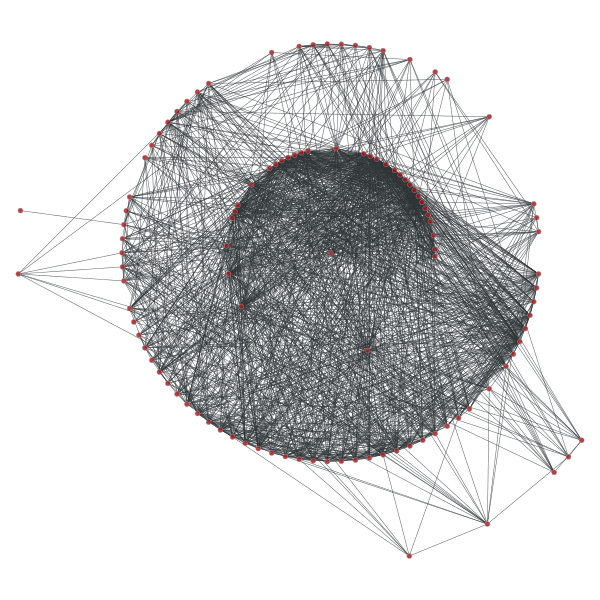

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f2e33cc4ed0, at 0x7f2e32188b90>

In [24]:
pos = gt.radial_tree_layout(graph,graph.vertex(1))
gt.graph_draw(graph, pos = pos,vertex_size = 5)

# Community Detection - Blockmodel Visualization

In [9]:
state = gt.minimize_blockmodel_dl(graph)

<BlockState object with 9 blocks (9 nonempty), degree-corrected, for graph <Graph object, undirected, with 111 vertices and 1469 edges at 0x7f1dc756e2d0>, at 0x7f1dc72c6d50>

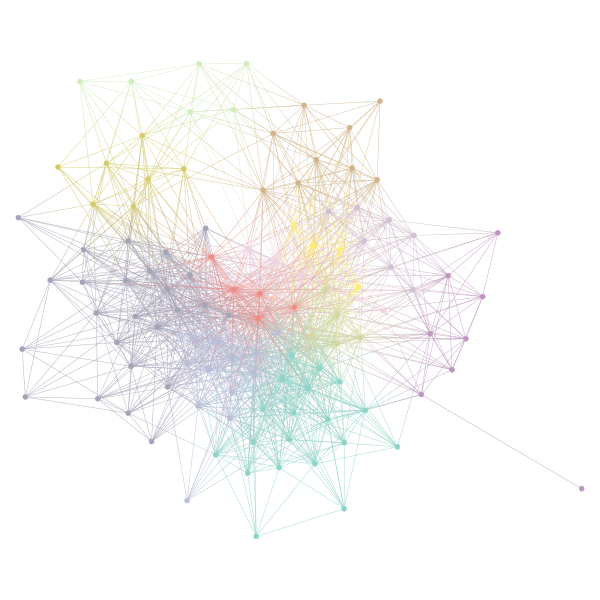

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f2e31c29d50, at 0x7f2e31bc8fd0>

In [90]:
b = state.get_blocks()
#state.draw(pos = graph.vp._graphml_vertex_id)
state.draw(vertex_size = 5)

In [8]:
state.entropy()

2925.4307897185736

In [5]:
e = state.get_matrix()

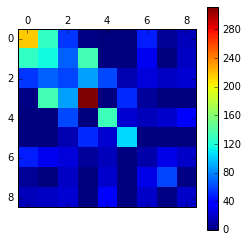

In [6]:
plt.matshow(e.todense())
plt.colorbar()

In [12]:
state_ndc = gt.minimize_nested_blockmodel_dl(graph,deg_corr = False)
state_dc = gt.minimize_nested_blockmodel_dl(graph,deg_corr = True)

In [13]:
print(state_ndc.entropy())
print(state_dc.entropy())

2868.6851636712354
2926.579316052081


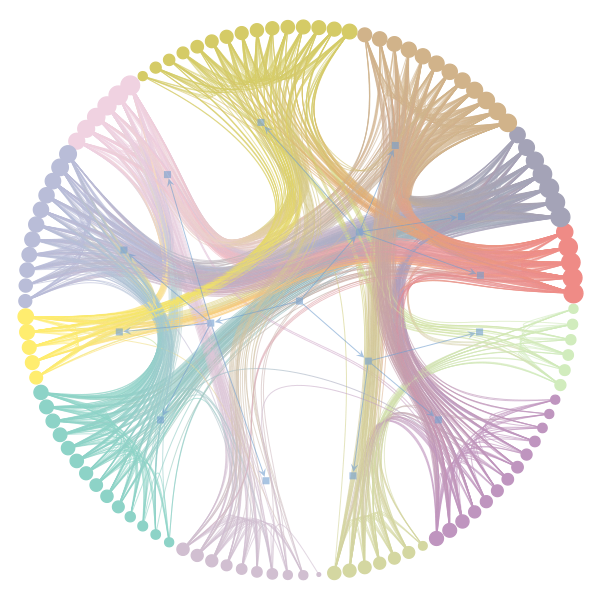

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1dc756e2d0, at 0x7f1dc0dcfc90>,
 <Graph object, directed, with 127 vertices and 126 edges at 0x7f1dc0ef4fd0>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1dc0ef4fd0, at 0x7f1dc0f7b610>)

In [14]:
state_ndc.draw()

In [20]:
state_ndc.print_summary()

l: 0, N: 111, B: 12
l: 1, N: 12, B: 3
l: 2, N: 3, B: 1


# Sampling from Posterior Distribution

In [27]:
state_p = gt.minimize_nested_blockmodel_dl(graph,deg_corr = False,verbose = True, 
                                           mcmc_equilibrate_args = dict(wait = 10, nbreaks = 2, 
                                                                        mcmc_args = dict(niter = 10), verbose = True))

    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected replacement (1, 1) -> (1, 1) , dS: 0.0
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected insert 1 , dS: 0.0
    l=0      B: 56 <- 111    shrinking 111 -> 85
    l=0      B: 56 <- 111    B=85  niter:     1  count:    0  breaks:  0  min_S: 3853.7067  max_S: 3871.9139  S: 3853.7067  ΔS:     -18.2072  moves:     6 
    l=0      B: 56 <- 111    B=85  niter:     2  count:    0  breaks:  0  min_S: 3846.7662  max_S: 3871.9139  S: 3846.7662  ΔS:     -6.94053  moves:     5 
    l=0      B: 56 <- 111    B=85  niter:     3  count:    1  breaks:  0  min_S: 3846.7662  max_S: 3871.9139  S: 3846.4140  ΔS:    -0.352221  moves:     1 
    l=0      B: 56 <- 111    B=85  ni

    l=0      B: 56 <- 111    B=56  niter:    23  count:    9  breaks:  1  min_S: 3468.4372  max_S: 3468.4372  S: 3468.4372  ΔS:      0.00000  moves:     0 
    l=0      B: 56 <- 111    B=56  niter:    24  count:   10  breaks:  2  min_S: 3468.4372  max_S: 3468.4372  S: 3468.4372  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (1, 56, 111) (3575.0675777657407, 3468.4372154008056, 4169.203142220656)
    l=0      B: 22 <- 56    shrinking 56 -> 43
    l=0      B: 22 <- 56    B=43  niter:     1  count:    0  breaks:  0  min_S: 3295.6365  max_S: 3302.0501  S: 3295.6365  ΔS:     -6.41360  moves:     4 
    l=0      B: 22 <- 56    B=43  niter:     2  count:    1  breaks:  0  min_S: 3295.6365  max_S: 3302.0501  S: 3295.6365  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 56    B=43  niter:     3  count:    2  breaks:  0  min_S: 3295.6365  max_S: 3302.0501  S: 3295.6365  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 56    B=43  niter:     4  count:    0  breaks:  0  min_

    l=0      B: 22 <- 56    B=25  niter:     9  count:    6  breaks:  0  min_S: 3015.6296  max_S: 3020.7306  S: 3015.6296  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 56    B=25  niter:    10  count:    7  breaks:  0  min_S: 3015.6296  max_S: 3020.7306  S: 3015.6296  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 56    B=25  niter:    11  count:    8  breaks:  0  min_S: 3015.6296  max_S: 3020.7306  S: 3015.6296  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 56    B=25  niter:    12  count:    9  breaks:  0  min_S: 3015.6296  max_S: 3020.7306  S: 3015.6296  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 56    B=25  niter:    13  count:    0  breaks:  1  min_S: 3015.6296  max_S: 3015.6296  S: 3015.6296  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 56    B=25  niter:    14  count:    1  breaks:  1  min_S: 3015.6296  max_S: 3015.6296  S: 3015.6296  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 56    B=25  niter:    15  count:    2  breaks:  

    l=0      B: 9 <- 22    shrinking 17 -> 13
    l=0      B: 9 <- 22    B=13  niter:     1  count:    0  breaks:  0  min_S: 2894.2230  max_S: 2902.8380  S: 2894.2230  ΔS:     -8.61503  moves:     3 
    l=0      B: 9 <- 22    B=13  niter:     2  count:    0  breaks:  0  min_S: 2888.9677  max_S: 2902.8380  S: 2888.9677  ΔS:     -5.25529  moves:     3 
    l=0      B: 9 <- 22    B=13  niter:     3  count:    0  breaks:  0  min_S: 2888.2421  max_S: 2902.8380  S: 2888.2421  ΔS:    -0.725624  moves:     1 
    l=0      B: 9 <- 22    B=13  niter:     4  count:    1  breaks:  0  min_S: 2888.2421  max_S: 2902.8380  S: 2888.1812  ΔS:   -0.0609041  moves:     1 
    l=0      B: 9 <- 22    B=13  niter:     5  count:    2  breaks:  0  min_S: 2888.2421  max_S: 2902.8380  S: 2888.1812  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 22    B=13  niter:     6  count:    3  breaks:  0  min_S: 2888.2421  max_S: 2902.8380  S: 2888.1812  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 22    B=1

    l=0      B: 14 <- 17    B=14  niter:     1  count:    0  breaks:  0  min_S: 2890.3716  max_S: 2903.9730  S: 2890.3716  ΔS:     -13.6014  moves:     5 
    l=0      B: 14 <- 17    B=14  niter:     2  count:    0  breaks:  0  min_S: 2888.2219  max_S: 2903.9730  S: 2888.2219  ΔS:     -2.14977  moves:     1 
    l=0      B: 14 <- 17    B=14  niter:     3  count:    1  breaks:  0  min_S: 2888.2219  max_S: 2903.9730  S: 2888.2219  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 17    B=14  niter:     4  count:    2  breaks:  0  min_S: 2888.2219  max_S: 2903.9730  S: 2888.2219  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 17    B=14  niter:     5  count:    3  breaks:  0  min_S: 2888.2219  max_S: 2903.9730  S: 2888.2219  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 17    B=14  niter:     6  count:    4  breaks:  0  min_S: 2888.2219  max_S: 2903.9730  S: 2888.2219  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 17    B=14  niter:     7  count:    5  breaks:  

    l=1      B: 7 <- 12    shrinking 12 -> 9
    l=1      B: 7 <- 12    B=9  niter:     1  count:    0  breaks:  0  min_S: 304.77893  max_S: 305.99739  S: 304.77893  ΔS:     -1.21846  moves:     1 
    l=1      B: 7 <- 12    B=9  niter:     2  count:    1  breaks:  0  min_S: 304.77893  max_S: 305.99739  S: 304.77893  ΔS:      0.00000  moves:     0 
    l=1      B: 7 <- 12    B=9  niter:     3  count:    2  breaks:  0  min_S: 304.77893  max_S: 305.99739  S: 304.77893  ΔS:      0.00000  moves:     0 
    l=1      B: 7 <- 12    B=9  niter:     4  count:    3  breaks:  0  min_S: 304.77893  max_S: 305.99739  S: 304.77893  ΔS:      0.00000  moves:     0 
    l=1      B: 7 <- 12    B=9  niter:     5  count:    4  breaks:  0  min_S: 304.77893  max_S: 305.99739  S: 304.77893  ΔS:      0.00000  moves:     0 
    l=1      B: 7 <- 12    B=9  niter:     6  count:    5  breaks:  0  min_S: 304.77893  max_S: 305.99739  S: 304.77893  ΔS:      0.00000  moves:     0 
    l=1      B: 7 <- 12    B=9  niter

    l=1      B: 4 <- 7    B=4  niter:     1  count:    1  breaks:  0  min_S: 304.24395  max_S: 304.24395  S: 304.24395  ΔS:      0.00000  moves:     0 
    l=1      B: 4 <- 7    B=4  niter:     2  count:    2  breaks:  0  min_S: 304.24395  max_S: 304.24395  S: 304.24395  ΔS:      0.00000  moves:     0 
    l=1      B: 4 <- 7    B=4  niter:     3  count:    3  breaks:  0  min_S: 304.24395  max_S: 304.24395  S: 304.24395  ΔS:      0.00000  moves:     0 
    l=1      B: 4 <- 7    B=4  niter:     4  count:    4  breaks:  0  min_S: 304.24395  max_S: 304.24395  S: 304.24395  ΔS:      0.00000  moves:     0 
    l=1      B: 4 <- 7    B=4  niter:     5  count:    5  breaks:  0  min_S: 304.24395  max_S: 304.24395  S: 304.24395  ΔS:      0.00000  moves:     0 
    l=1      B: 4 <- 7    B=4  niter:     6  count:    6  breaks:  0  min_S: 304.24395  max_S: 304.24395  S: 304.24395  ΔS:      0.00000  moves:     0 
    l=1      B: 4 <- 7    B=4  niter:     7  count:    7  breaks:  0  min_S: 304.24395  

    l=2      B: 3 <- 6    B=4  niter:     1  count:    1  breaks:  0  min_S: 113.41462  max_S: 113.41462  S: 113.41462  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=4  niter:     2  count:    2  breaks:  0  min_S: 113.41462  max_S: 113.41462  S: 113.41462  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=4  niter:     3  count:    3  breaks:  0  min_S: 113.41462  max_S: 113.41462  S: 113.41462  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=4  niter:     4  count:    4  breaks:  0  min_S: 113.41462  max_S: 113.41462  S: 113.41462  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=4  niter:     5  count:    5  breaks:  0  min_S: 113.41462  max_S: 113.41462  S: 113.41462  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=4  niter:     6  count:    6  breaks:  0  min_S: 113.41462  max_S: 113.41462  S: 113.41462  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=4  niter:     7  count:    7  breaks:  0  min_S: 113.41462  

level 2 : rejected replacement (6, 1) -> (6, 1) , dS: 0.0
    l=2      B: 3 <- 6    shrinking 6 -> 5
    l=2      B: 3 <- 6    B=5  niter:     1  count:    1  breaks:  0  min_S: 112.42022  max_S: 112.42022  S: 112.42022  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=5  niter:     2  count:    2  breaks:  0  min_S: 112.42022  max_S: 112.42022  S: 112.42022  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=5  niter:     3  count:    3  breaks:  0  min_S: 112.42022  max_S: 112.42022  S: 112.42022  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=5  niter:     4  count:    4  breaks:  0  min_S: 112.42022  max_S: 112.42022  S: 112.42022  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=5  niter:     5  count:    5  breaks:  0  min_S: 112.42022  max_S: 112.42022  S: 112.42022  ΔS:      0.00000  moves:     0 
    l=2      B: 3 <- 6    B=5  niter:     6  count:    6  breaks:  0  min_S: 112.42022  max_S: 112.42022  S: 112.42022  ΔS:      0.00000  m

level 2 : rejected insert 6 , dS: 8.371010681238204
level 1 : skipping 6
    l=0      B: 56 <- 111    shrinking 111 -> 85
    l=0      B: 56 <- 111    B=85  niter:     1  count:    0  breaks:  0  min_S: 3474.8893  max_S: 3479.4215  S: 3474.8893  ΔS:     -4.53216  moves:     3 
    l=0      B: 56 <- 111    B=85  niter:     2  count:    0  breaks:  0  min_S: 3472.2461  max_S: 3479.4215  S: 3472.2461  ΔS:     -2.64317  moves:     2 
    l=0      B: 56 <- 111    B=85  niter:     3  count:    0  breaks:  0  min_S: 3471.5530  max_S: 3479.4215  S: 3471.5530  ΔS:    -0.693147  moves:     1 
    l=0      B: 56 <- 111    B=85  niter:     4  count:    1  breaks:  0  min_S: 3471.5530  max_S: 3479.4215  S: 3471.5530  ΔS:      0.00000  moves:     0 
    l=0      B: 56 <- 111    B=85  niter:     5  count:    0  breaks:  0  min_S: 3471.0298  max_S: 3479.4215  S: 3471.0298  ΔS:    -0.523248  moves:     1 
    l=0      B: 56 <- 111    B=85  niter:     6  count:    0  breaks:  0  min_S: 3470.0489  max_S:

    l=0      B: 56 <- 111    B=56  niter:    23  count:    6  breaks:  1  min_S: 3165.5808  max_S: 3165.5808  S: 3165.5808  ΔS:      0.00000  moves:     0 
    l=0      B: 56 <- 111    B=56  niter:    24  count:    7  breaks:  1  min_S: 3165.5808  max_S: 3165.5808  S: 3165.5808  ΔS:      0.00000  moves:     0 
    l=0      B: 56 <- 111    B=56  niter:    25  count:    8  breaks:  1  min_S: 3165.5808  max_S: 3165.5808  S: 3165.5808  ΔS:      0.00000  moves:     0 
    l=0      B: 56 <- 111    B=56  niter:    26  count:    9  breaks:  1  min_S: 3165.5808  max_S: 3165.5808  S: 3165.5808  ΔS:      0.00000  moves:     0 
    l=0      B: 56 <- 111    B=56  niter:    27  count:   10  breaks:  2  min_S: 3165.5808  max_S: 3165.5808  S: 3165.5808  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (6, 56, 111) (2990.906764519858, 3165.5808298163593, 3709.546519857037)
    l=0      B: 35 <- 56    shrinking 56 -> 43
    l=0      B: 35 <- 56    B=43  niter:     1  count:    0  breaks:  0  mi

    l=0      B: 22 <- 35    B=27  niter:     1  count:    0  breaks:  0  min_S: 2868.3640  max_S: 2869.2052  S: 2868.3640  ΔS:    -0.841131  moves:     1 
    l=0      B: 22 <- 35    B=27  niter:     2  count:    1  breaks:  0  min_S: 2868.3640  max_S: 2869.2052  S: 2868.3640  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 35    B=27  niter:     3  count:    2  breaks:  0  min_S: 2868.3640  max_S: 2869.2052  S: 2868.3640  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 35    B=27  niter:     4  count:    3  breaks:  0  min_S: 2868.3640  max_S: 2869.2052  S: 2868.3640  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 35    B=27  niter:     5  count:    4  breaks:  0  min_S: 2868.3640  max_S: 2869.2052  S: 2868.3640  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 35    B=27  niter:     6  count:    5  breaks:  0  min_S: 2868.3640  max_S: 2869.2052  S: 2868.3640  ΔS:      0.00000  moves:     0 
    l=0      B: 22 <- 35    B=27  niter:     7  count:    6  breaks:  

    l=0      B: 14 <- 22    B=14  niter:     1  count:    0  breaks:  0  min_S: 2774.7148  max_S: 2775.3423  S: 2774.7148  ΔS:    -0.627482  moves:     1 
    l=0      B: 14 <- 22    B=14  niter:     2  count:    1  breaks:  0  min_S: 2774.7148  max_S: 2775.3423  S: 2774.7148  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 22    B=14  niter:     3  count:    2  breaks:  0  min_S: 2774.7148  max_S: 2775.3423  S: 2774.7148  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 22    B=14  niter:     4  count:    3  breaks:  0  min_S: 2774.7148  max_S: 2775.3423  S: 2774.7148  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 22    B=14  niter:     5  count:    4  breaks:  0  min_S: 2774.7148  max_S: 2775.3423  S: 2774.7148  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 22    B=14  niter:     6  count:    5  breaks:  0  min_S: 2774.7148  max_S: 2775.3423  S: 2774.7148  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 22    B=14  niter:     7  count:    6  breaks:  

    l=0      B: 12 <- 14    B=12  niter:     1  count:    0  breaks:  0  min_S: 2770.5310  max_S: 2777.6453  S: 2770.5310  ΔS:     -7.11425  moves:     1 
    l=0      B: 12 <- 14    B=12  niter:     2  count:    1  breaks:  0  min_S: 2770.5310  max_S: 2777.6453  S: 2770.5310  ΔS:      0.00000  moves:     0 
    l=0      B: 12 <- 14    B=12  niter:     3  count:    2  breaks:  0  min_S: 2770.5310  max_S: 2777.6453  S: 2770.5310  ΔS:      0.00000  moves:     0 
    l=0      B: 12 <- 14    B=12  niter:     4  count:    3  breaks:  0  min_S: 2770.5310  max_S: 2777.6453  S: 2770.5310  ΔS:      0.00000  moves:     0 
    l=0      B: 12 <- 14    B=12  niter:     5  count:    4  breaks:  0  min_S: 2770.5310  max_S: 2777.6453  S: 2770.5310  ΔS:      0.00000  moves:     0 
    l=0      B: 12 <- 14    B=12  niter:     6  count:    5  breaks:  0  min_S: 2770.5310  max_S: 2777.6453  S: 2770.5310  ΔS:      0.00000  moves:     0 
    l=0      B: 12 <- 14    B=12  niter:     7  count:    6  breaks:  

    l=1      B: 8 <- 13    B=8  niter:    10  count:    5  breaks:  0  min_S: 328.59687  max_S: 331.01858  S: 328.59687  ΔS:      0.00000  moves:     0 
    l=1      B: 8 <- 13    B=8  niter:    11  count:    6  breaks:  0  min_S: 328.59687  max_S: 331.01858  S: 328.59687  ΔS:      0.00000  moves:     0 
    l=1      B: 8 <- 13    B=8  niter:    12  count:    7  breaks:  0  min_S: 328.59687  max_S: 331.01858  S: 328.59687  ΔS:      0.00000  moves:     0 
    l=1      B: 8 <- 13    B=8  niter:    13  count:    8  breaks:  0  min_S: 328.59687  max_S: 331.01858  S: 328.59687  ΔS:      0.00000  moves:     0 
    l=1      B: 8 <- 13    B=8  niter:    14  count:    9  breaks:  0  min_S: 328.59687  max_S: 331.01858  S: 328.59687  ΔS:      0.00000  moves:     0 
    l=1      B: 8 <- 13    B=8  niter:    15  count:    0  breaks:  1  min_S: 328.59687  max_S: 328.59687  S: 328.59687  ΔS:      0.00000  moves:     0 
    l=1      B: 8 <- 13    B=8  niter:    16  count:    1  breaks:  1  min_S: 328.

    l=1      B: 3 <- 5    B=3  niter:     1  count:    1  breaks:  0  min_S: 321.49452  max_S: 321.49452  S: 321.49452  ΔS:      0.00000  moves:     0 
    l=1      B: 3 <- 5    B=3  niter:     2  count:    2  breaks:  0  min_S: 321.49452  max_S: 321.49452  S: 321.49452  ΔS:      0.00000  moves:     0 
    l=1      B: 3 <- 5    B=3  niter:     3  count:    3  breaks:  0  min_S: 321.49452  max_S: 321.49452  S: 321.49452  ΔS:      0.00000  moves:     0 
    l=1      B: 3 <- 5    B=3  niter:     4  count:    4  breaks:  0  min_S: 321.49452  max_S: 321.49452  S: 321.49452  ΔS:      0.00000  moves:     0 
    l=1      B: 3 <- 5    B=3  niter:     5  count:    5  breaks:  0  min_S: 321.49452  max_S: 321.49452  S: 321.49452  ΔS:      0.00000  moves:     0 
    l=1      B: 3 <- 5    B=3  niter:     6  count:    6  breaks:  0  min_S: 321.49452  max_S: 321.49452  S: 321.49452  ΔS:      0.00000  moves:     0 
    l=1      B: 3 <- 5    B=3  niter:     7  count:    7  breaks:  0  min_S: 321.49452  

level 2 : rejected replacement (3, 1) -> (3, 1) , dS: 0.0
    l=2      B: 2 <- 3    shrinking 3 -> 2
    l=2      B: 2 <- 3    B=2  niter:     1  count:    1  breaks:  0  min_S: 35.710866  max_S: 35.710866  S: 35.710866  ΔS:      0.00000  moves:     0 
    l=2      B: 2 <- 3    B=2  niter:     2  count:    2  breaks:  0  min_S: 35.710866  max_S: 35.710866  S: 35.710866  ΔS:      0.00000  moves:     0 
    l=2      B: 2 <- 3    B=2  niter:     3  count:    3  breaks:  0  min_S: 35.710866  max_S: 35.710866  S: 35.710866  ΔS:      0.00000  moves:     0 
    l=2      B: 2 <- 3    B=2  niter:     4  count:    4  breaks:  0  min_S: 35.710866  max_S: 35.710866  S: 35.710866  ΔS:      0.00000  moves:     0 
    l=2      B: 2 <- 3    B=2  niter:     5  count:    5  breaks:  0  min_S: 35.710866  max_S: 35.710866  S: 35.710866  ΔS:      0.00000  moves:     0 
    l=2      B: 2 <- 3    B=2  niter:     6  count:    6  breaks:  0  min_S: 35.710866  max_S: 35.710866  S: 35.710866  ΔS:      0.00000  m

    l=0      B: 56 <- 111    B=65  niter:     1  count:    0  breaks:  0  min_S: 3425.5676  max_S: 3434.3193  S: 3425.5676  ΔS:     -8.75176  moves:     4 
    l=0      B: 56 <- 111    B=65  niter:     2  count:    0  breaks:  0  min_S: 3423.9589  max_S: 3434.3193  S: 3423.9589  ΔS:     -1.60865  moves:     2 
    l=0      B: 56 <- 111    B=65  niter:     3  count:    0  breaks:  0  min_S: 3423.0682  max_S: 3434.3193  S: 3423.0682  ΔS:    -0.890759  moves:     1 
    l=0      B: 56 <- 111    B=65  niter:     4  count:    0  breaks:  0  min_S: 3422.5897  max_S: 3434.3193  S: 3422.5897  ΔS:    -0.478488  moves:     2 
    l=0      B: 56 <- 111    B=65  niter:     5  count:    0  breaks:  0  min_S: 3421.1366  max_S: 3434.3193  S: 3421.1366  ΔS:     -1.45304  moves:     2 
    l=0      B: 56 <- 111    B=65  niter:     6  count:    1  breaks:  0  min_S: 3421.1366  max_S: 3434.3193  S: 3421.1366  ΔS:      0.00000  moves:     0 
    l=0      B: 56 <- 111    B=65  niter:     7  count:    0  br

    l=0      B: 35 <- 56    B=43  niter:     1  count:    0  breaks:  0  min_S: 3116.3657  max_S: 3117.0860  S: 3116.3657  ΔS:    -0.720246  moves:     2 
    l=0      B: 35 <- 56    B=43  niter:     2  count:    1  breaks:  0  min_S: 3116.3657  max_S: 3117.0860  S: 3116.3657  ΔS:      0.00000  moves:     0 
    l=0      B: 35 <- 56    B=43  niter:     3  count:    0  breaks:  0  min_S: 3114.5854  max_S: 3117.0860  S: 3114.5854  ΔS:     -1.78031  moves:     2 
    l=0      B: 35 <- 56    B=43  niter:     4  count:    0  breaks:  0  min_S: 3110.6600  max_S: 3117.0860  S: 3110.6600  ΔS:     -3.92536  moves:     1 
    l=0      B: 35 <- 56    B=43  niter:     5  count:    0  breaks:  0  min_S: 3108.9228  max_S: 3117.0860  S: 3108.9228  ΔS:     -1.73720  moves:     1 
    l=0      B: 35 <- 56    B=43  niter:     6  count:    0  breaks:  0  min_S: 3103.6657  max_S: 3117.0860  S: 3103.6657  ΔS:     -5.25711  moves:     1 
    l=0      B: 35 <- 56    B=43  niter:     7  count:    1  breaks:  

    l=0      B: 35 <- 56    B=35  niter:    18  count:    4  breaks:  1  min_S: 3002.0173  max_S: 3002.0173  S: 3002.0173  ΔS:      0.00000  moves:     0 
    l=0      B: 35 <- 56    B=35  niter:    19  count:    5  breaks:  1  min_S: 3002.0173  max_S: 3002.0173  S: 3002.0173  ΔS:      0.00000  moves:     0 
    l=0      B: 35 <- 56    B=35  niter:    20  count:    6  breaks:  1  min_S: 3002.0173  max_S: 3002.0173  S: 3002.0173  ΔS:      0.00000  moves:     0 
    l=0      B: 35 <- 56    B=35  niter:    21  count:    7  breaks:  1  min_S: 3002.0173  max_S: 3002.0173  S: 3001.9328  ΔS:   -0.0845927  moves:     1 
    l=0      B: 35 <- 56    B=35  niter:    22  count:    8  breaks:  1  min_S: 3002.0173  max_S: 3002.0173  S: 3001.9328  ΔS:      0.00000  moves:     0 
    l=0      B: 35 <- 56    B=35  niter:    23  count:    9  breaks:  1  min_S: 3002.0173  max_S: 3002.0173  S: 3001.9328  ΔS:      0.00000  moves:     0 
    l=0      B: 35 <- 56    B=35  niter:    24  count:   10  breaks:  

    l=0      B: 14 <- 22    B=17  niter:     1  count:    0  breaks:  0  min_S: 2865.7122  max_S: 2871.6400  S: 2865.7122  ΔS:     -5.92780  moves:     3 
    l=0      B: 14 <- 22    B=17  niter:     2  count:    0  breaks:  0  min_S: 2860.1008  max_S: 2871.6400  S: 2860.1008  ΔS:     -5.61141  moves:     3 
    l=0      B: 14 <- 22    B=17  niter:     3  count:    0  breaks:  0  min_S: 2857.4596  max_S: 2871.6400  S: 2857.4596  ΔS:     -2.64122  moves:     2 
    l=0      B: 14 <- 22    B=17  niter:     4  count:    0  breaks:  0  min_S: 2852.3733  max_S: 2871.6400  S: 2852.3733  ΔS:     -5.08627  moves:     4 
    l=0      B: 14 <- 22    B=17  niter:     5  count:    1  breaks:  0  min_S: 2852.3733  max_S: 2871.6400  S: 2852.3733  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 22    B=17  niter:     6  count:    2  breaks:  0  min_S: 2852.3733  max_S: 2871.6400  S: 2852.3733  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 22    B=17  niter:     7  count:    3  breaks:  

    l=0      B: 9 <- 14    B=11  niter:    18  count:    5  breaks:  1  min_S: 2860.1403  max_S: 2860.1403  S: 2860.1403  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 14    B=11  niter:    19  count:    6  breaks:  1  min_S: 2860.1403  max_S: 2860.1403  S: 2860.1403  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 14    B=11  niter:    20  count:    7  breaks:  1  min_S: 2860.1403  max_S: 2860.1403  S: 2860.1403  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 14    B=11  niter:    21  count:    8  breaks:  1  min_S: 2860.1403  max_S: 2860.1403  S: 2860.1403  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 14    B=11  niter:    22  count:    9  breaks:  1  min_S: 2860.1403  max_S: 2860.1403  S: 2860.1403  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 14    B=11  niter:    23  count:   10  breaks:  2  min_S: 2860.1403  max_S: 2860.1403  S: 2860.1403  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 14    shrinking 11 -> 9
    l=0      B: 9 <- 14    B=9 

    l=0      B: 16 <- 17    B=16  niter:     2  count:    2  breaks:  0  min_S: 2845.3799  max_S: 2845.3799  S: 2845.3799  ΔS:      0.00000  moves:     0 
    l=0      B: 16 <- 17    B=16  niter:     3  count:    3  breaks:  0  min_S: 2845.3799  max_S: 2845.3799  S: 2845.3799  ΔS:      0.00000  moves:     0 
    l=0      B: 16 <- 17    B=16  niter:     4  count:    4  breaks:  0  min_S: 2845.3799  max_S: 2845.3799  S: 2845.3799  ΔS:      0.00000  moves:     0 
    l=0      B: 16 <- 17    B=16  niter:     5  count:    5  breaks:  0  min_S: 2845.3799  max_S: 2845.3799  S: 2845.3799  ΔS:      0.00000  moves:     0 
    l=0      B: 16 <- 17    B=16  niter:     6  count:    6  breaks:  0  min_S: 2845.3799  max_S: 2845.3799  S: 2845.3799  ΔS:      0.00000  moves:     0 
    l=0      B: 16 <- 17    B=16  niter:     7  count:    7  breaks:  0  min_S: 2845.3799  max_S: 2845.3799  S: 2845.3799  ΔS:      0.00000  moves:     0 
    l=0      B: 16 <- 17    B=16  niter:     8  count:    8  breaks:  

In [29]:
state_p.entropy()

2863.704465859591

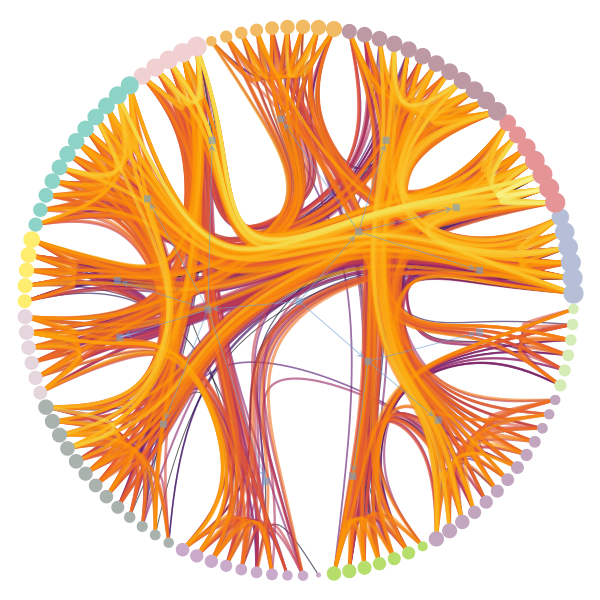

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1dc756e2d0, at 0x7f1dc0e19c50>,
 <Graph object, directed, with 128 vertices and 127 edges at 0x7f1dc0e139d0>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1dc0e139d0, at 0x7f1dc0e13490>)

In [33]:
state_p.draw(edge_color = gt.prop_to_size(graph.ep.weight, power = 1, log = True), ecmap = (plt.cm.inferno, .6),
             eorder = graph.ep.weight, edge_pen_width = gt.prop_to_size(graph.ep.weight,1,4,power = 1, log = True),
             edge_gradient = [])

In [36]:
state_p.print_summary()

l: 0, N: 111, B: 13
l: 1, N: 13, B: 3
l: 2, N: 3, B: 1


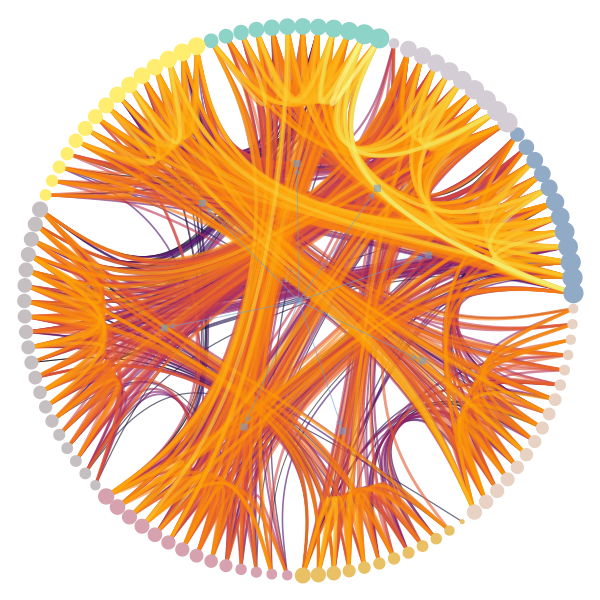

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1dc756e2d0, at 0x7f1dc0e21b10>,
 <Graph object, directed, with 120 vertices and 119 edges at 0x7f1dc0e51d10>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1dc0e51d10, at 0x7f1dc0e51990>)

In [49]:
import numpy as np
y = graph.ep.weight.copy()
y.a = np.log(y.a)
state_ln = gt.minimize_nested_blockmodel_dl(graph,state_args = dict(recs = [y], 
                                                                    rec_types=["real-normal"]))
state_ln.draw(edge_color = gt.prop_to_size(graph.ep.weight, power = 1, log = True), ecmap = (plt.cm.inferno, .6),
             eorder = graph.ep.weight, edge_pen_width = gt.prop_to_size(graph.ep.weight,1,4,power = 1, log = True),
             edge_gradient = [])

In [50]:
L1 = -state_p.entropy()
L2 = -state_ln.entropy() - np.log(graph.ep.weight.a).sum()
L2 - L1

-11047.670028883444

In [55]:
state = gt.minimize_nested_blockmodel_dl(graph,deg_corr = False) # Initialize he Markov
                                            # chain from the "ground
                                            # state"
#state_p = gt.minimize_nested_blockmodel_dl(graph,deg_corr = False,verbose = True, 
#                                           mcmc_equilibrate_args = dict(wait = 10, nbreaks = 2, 
#                                                                        mcmc_args = dict(niter = 10), verbose = True))
# Before doing model averaging, the need to create a NestedBlockState
# by passing sampling = True.

# We also want to increase the maximum hierarchy depth to L = 10

# We can do both of the above by copying.

bs = state.get_bs()                     # Get hierarchical partition.
bs += [np.zeros(1)] * (10 - len(bs))    # Augment it to L = 10 with
                                        # single-group levels.

state = state.copy(bs=bs, sampling=True)

# Now we run 1000 sweeps of the MCMC

dS, nmoves = state.mcmc_sweep(niter=1000)

print("Change in description length:", dS)
print("Number of accepted vertex moves:", nmoves)


# We will first equilibrate the Markov chain
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

('Change in description length:', 4.156286443575609)
('Number of accepted vertex moves:', 27846)


(2876.2535030535637, 1209258)

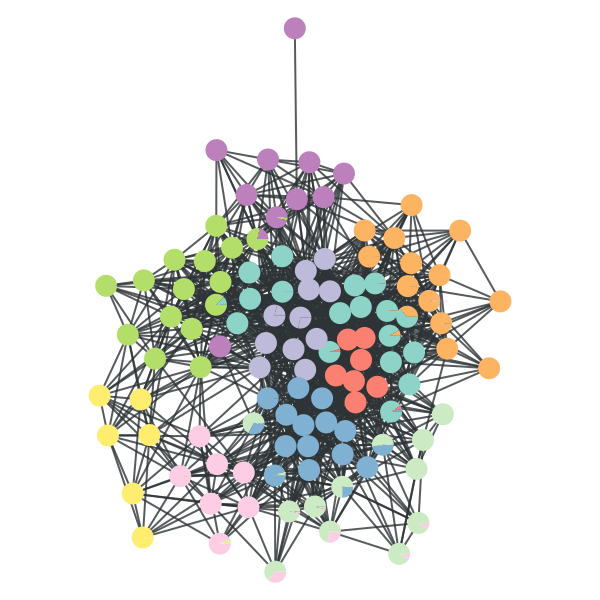

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1dc756e2d0, at 0x7f1dc04c30d0>

In [76]:
pv = [None] * len(state.get_levels())

def collect_marginals(s):
   global pv
   pv = [sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

# Now we collect the marginals for exactly 100,000 sweeps
gt.mcmc_equilibrate(state, force_niter=5000, mcmc_args=dict(niter=10),
                    callback=collect_marginals)

# Now the node marginals for all levels are stored in property map
# list pv. We can visualize the first level as pie charts on the nodes:
state_0 = state.get_levels()[0]
state_0.draw(vertex_shape="pie", vertex_pie_fractions=pv[0],
             edge_gradient=None,vertex_size = 20)

In [61]:
state.entropy()

2866.714162679479

In [69]:
h = [np.zeros(graph.num_vertices() + 1) for s in state.get_levels()]

def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
       B = sl.get_nonempty_B()
       h[l][B] += 1

# Now we collect the marginal distribution for exactly 100,000 sweeps
gt.mcmc_equilibrate(state, force_niter=5000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(2865.6153120033046, 1439759)

In [75]:
h

[array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 4999.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.]),
 array([0.000e+00, 0.000e+00, 0.000e+00, 3.038e+03, 1.671e+03, 1.880e+02,
        7.600e+01, 2.300e+01, 3.000e